In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import r2_score, classification_report, roc_curve, auc, confusion_matrix, precision_recall_curve, mean_absolute_error
from sklearn.preprocessing import label_binarize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

def plot_confusion_matrix(
    working_dir, cm, target_names, title="Confusion matrix", cmap=None, normalize=False
):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(9, 8))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                f"{cm[i, j]:0.4f}",
                horizontalalignment="center",
                color="black",
                # color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                f"{cm[i, j]:,}",
                horizontalalignment="center",
                color="black",
                # color="white" if cm[i, j] > thresh else "black",
            )

    plt.ylabel("True label")
    plt.xlabel(f"Predicted label\naccuracy={accuracy:0.4f}; misclass={misclass:0.4f}")

    #plt.savefig(os.path.join(working_dir, title + ".pdf"))
    #plt.savefig(os.path.join(working_dir, title + ".png"))
    #plt.clf()


def print_classification_report(y_true, y_pred):
    """
    Prints classification report to stdout.

    Args:
        y_true (nparray): 1D npy array containing int values for class
        y_pred (nparray): 1D npy array containing int values for predicted class
        train_gen (Keras Generator): Training generator used for model training, used for labels
    """
    print("Classification Report")
    print(classification_report(y_true, y_pred))



In [18]:
df = pd.read_csv("stat_res.csv")
df["sweep"] = np.where(df["sweep"] == "neut", "neut", "sweep")
df["num_sweep"] = np.where(df["sweep"] == "neut", 0, 1)
df["fit_class"] = np.where(df["fit_pval"] <= 0.05, "sweep", "neut")
df["fet_class"] = np.where(df["fet_pval"] <= 0.05, "sweep", "neut")
df["fit_prob"] = 1 - df["fit_pval"]
df["fet_prob"] = 1 - df["fet_pval"]

df.head()
fdf = df

Classification Report
              precision    recall  f1-score   support

        neut       0.38      1.00      0.55      4994
       sweep       1.00      0.20      0.33      9963

    accuracy                           0.46     14957
   macro avg       0.69      0.60      0.44     14957
weighted avg       0.79      0.46      0.40     14957



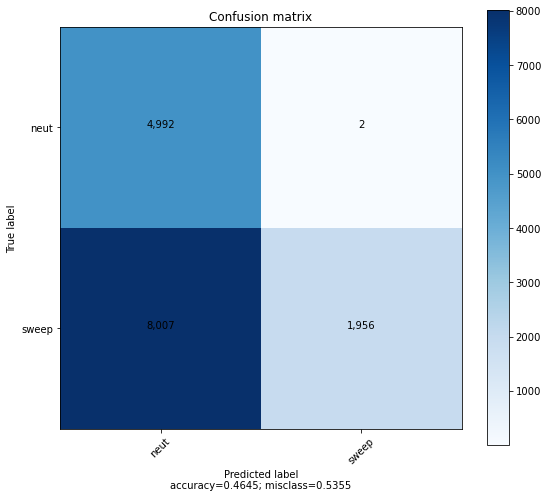

In [10]:
print_classification_report(fdf["sweep"], fdf["fit_class"])
plot_confusion_matrix('.', confusion_matrix(fdf["sweep"], fdf["fit_class"], labels=fdf["fit_class"].unique()), list(fdf["fit_class"].unique()))


Classification Report


/nas/longleaf/rhel8/apps/anaconda/2021.11/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/nas/longleaf/rhel8/apps/anaconda/2021.11/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        neut       0.33      1.00      0.50      4994
       sweep       0.00      0.00      0.00      9963

    accuracy                           0.33     14957
   macro avg       0.17      0.50      0.25     14957
weighted avg       0.11      0.33      0.17     14957



/nas/longleaf/rhel8/apps/anaconda/2021.11/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


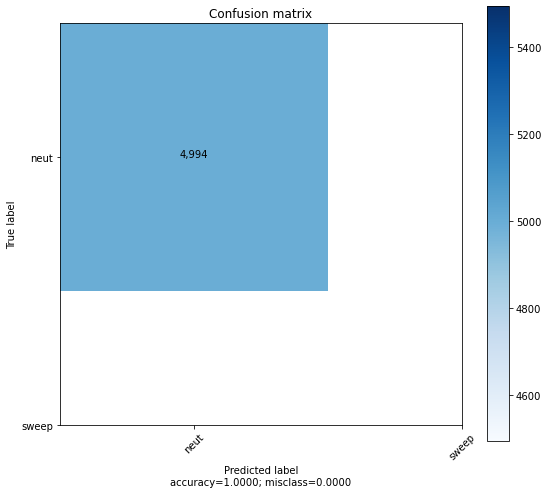

In [11]:
print_classification_report(fdf["sweep"], fdf["fet_class"])
plot_confusion_matrix('.', confusion_matrix(fdf["sweep"], fdf["fet_class"], labels=fdf["fet_class"].unique()), list(fdf["fit_class"].unique()))


In [23]:
fdf.head()
fdf.describe()
fdf.dropna(inplace=True)

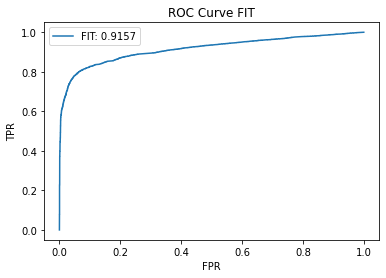

In [24]:
"""Plot ROC curve by binarizing neutral/sweep."""

# Plot sdn/ssv distinction
swp_fpr, swp_tpr, thresh = roc_curve(df["num_sweep"], df["fit_prob"])
swp_auc_val = auc(swp_fpr, swp_tpr)
plt.plot(
    swp_fpr,
    swp_tpr,
    label=f"FIT: {swp_auc_val:.4}",
)

plt.title(f"ROC Curve FIT")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()


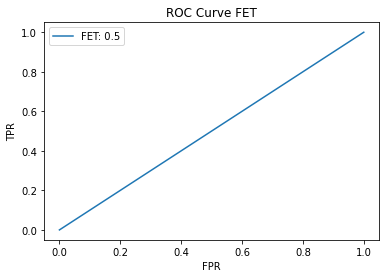

In [25]:
"""Plot ROC curve by binarizing neutral/sweep."""

# Plot sdn/ssv distinction
swp_fpr, swp_tpr, thresh = roc_curve(df["num_sweep"], df["fet_prob"])
swp_auc_val = auc(swp_fpr, swp_tpr)
plt.plot(
    swp_fpr,
    swp_tpr,
    label=f"FET: {swp_auc_val:.4}",
)

plt.title(f"ROC Curve FET")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()

plt.show()